In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [16]:
df = pd.read_csv('C:/Users/jjd20/bilibili_user_info.csv',encoding = 'gbk')

In [17]:
df

,mid,name,rank,birthd0y,sign,level,vipType,vipStatus,following,fans
0,21562404,'一朵诱人的小菊花',10000,0,1,5,1,0,446,1
1,21562405,'cassielau1990',10000,0,0,5,1,1,90,0
2,21562406,'ffjsunshine',10000,0,0,3,0,0,11,0
3,21562407,'ZHitlerZ',10000,1,1,3,0,0,6,1
4,21562408,'wenjan',10000,0,0,5,1,0,25,1
...,...,...,...,...,...,...,...,...,...,...
1093,631616595,'bili_82622110408',5000,0,0,0,0,0,1,0
1094,631616596,'小小小小-0',5000,0,1,0,0,0,0,0
1095,631616612,'bili_21702037000',10000,0,0,1,0,0,1,0
1096,631616618,'玄剑林',10000,0,0,2,1,0,0,0


In [18]:
df.isnull().any()

mid          False
name         False
rank         False
birthd0y     False
sign         False
level        False
vipType      False
vipStatus    False
following    False
fans         False
dtype: bool

<AxesSubplot:ylabel='following'>

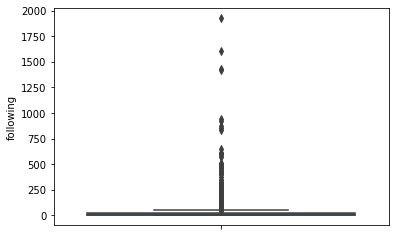

In [19]:
sns.boxplot(y='following', data=df)

In [20]:
# 对年龄异常值进行处理
following_q1 = df['following'].quantile(0.25)
following_q3 = df['following'].quantile(0.75)
IQR = following_q3 - following_q1
df = df[ (df['following'] <= following_q3+1.5*IQR) &(df['following'] >= following_q1-1.5*IQR) ]

<AxesSubplot:ylabel='following'>

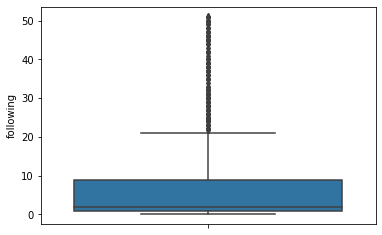

In [21]:
# 继续用箱线图查看
sns.boxplot(y='following', data=df)

In [22]:
df

,mid,name,rank,birthd0y,sign,level,vipType,vipStatus,following,fans
2,21562406,'ffjsunshine',10000,0,0,3,0,0,11,0
3,21562407,'ZHitlerZ',10000,1,1,3,0,0,6,1
4,21562408,'wenjan',10000,0,0,5,1,0,25,1
5,21562409,'小爷很骚',10000,0,0,1,0,0,3,0
6,21562410,'弄昵称好烦',10000,0,0,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
1093,631616595,'bili_82622110408',5000,0,0,0,0,0,1,0
1094,631616596,'小小小小-0',5000,0,1,0,0,0,0,0
1095,631616612,'bili_21702037000',10000,0,0,1,0,0,1,0
1096,631616618,'玄剑林',10000,0,0,2,1,0,0,0


<AxesSubplot:>

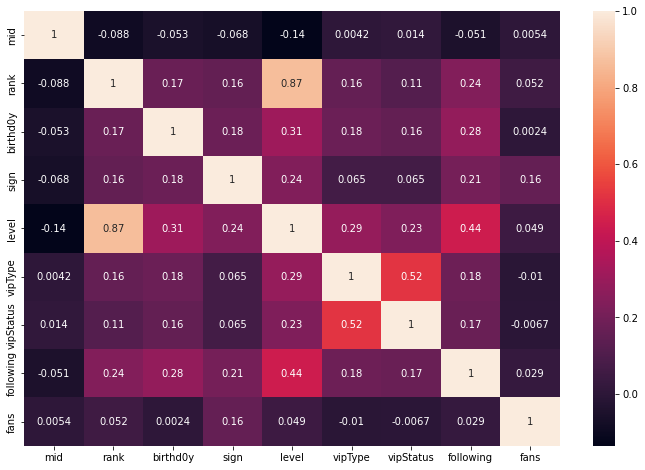

In [26]:
import seaborn as sns
fig = plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True)

In [8]:
X=df.loc[:, ["birthd0y","sign","vipType","vipStatus","following","fans"]]
Y=df['level']

In [25]:
import pandas as pd
from scipy.stats import pearsonr

# 假设你的数据集已经存在，命名为df
# df 包含了特征列 'mid', 'name', 'rank', 'birthd0y', 'sign', 'level', 'vipType', 'vipStatus', 'following', 'fans'

# 选择需要进行特征选择的列
selected_columns = ['rank', 'birthd0y', 'sign', 'level', 'vipType', 'vipStatus', 'following', 'fans']

# 剔除不需要的列 'mid' 和 'name'
df_selected = df[selected_columns]

# 剔除含有缺失值的行
df_selected = df_selected.dropna()

# 获取特征列和目标列
features = df_selected.drop("level", axis=1)
target = df_selected["level"]

# 计算特征与目标之间的Pearson相关系数
correlations = []
for feature in features.columns:
    corr, _ = pearsonr(features[feature], target)
    correlations.append(corr)

# 创建包含特征和相关系数的DataFrame
corr_df = pd.DataFrame({"Feature": features.columns, "Correlation": correlations})

# 按相关系数的绝对值降序排序
corr_df = corr_df.reindex(corr_df["Correlation"].abs().sort_values(ascending=False).index)

# 输出特征及其相关系数
print(corr_df)


     Feature  Correlation
0       rank     0.866592
5  following     0.438446
1   birthd0y     0.311075
3    vipType     0.289914
2       sign     0.236706
4  vipStatus     0.228864
6       fans     0.049370


<AxesSubplot:xlabel='level', ylabel='following'>

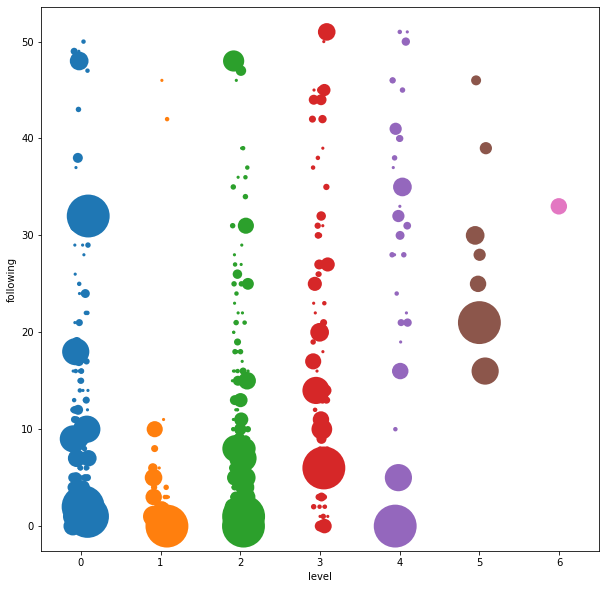

In [10]:
from matplotlib import pyplot as plt
x=df["level"]
y=df["following"]

fig = plt.figure(figsize=(10,10)) 
ax1 = fig.add_subplot(111)
sns.stripplot(x=x,y=y,sizes=df.groupby(['level', 'following']).size().reset_index(name='counts').counts * 10, ax=ax1) #计数图

In [11]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error

x=df.loc[:,["level"]] 
y=df.loc[:,["following"]]

model=linear_model.LinearRegression()
model.fit(x,y)
a = model.coef_[0]
b = model.intercept_
print("回归方程为: following=",a,"*level +",b)

回归方程为: following= [3.95717079] *level + [3.27438134]


In [12]:
R2 = model.score(x,y)
print("拟合系数R2为：",R2)

拟合系数R2为： 0.19223518157998498


In [13]:
pred=model.predict(x)
rmse=mean_squared_error(y,pred)**0.5
print("rmse is:",rmse)

rmse is: 10.14989358272443


In [14]:
def KmeanCut(data,k):
    from sklearn.cluster import KMeans #引入KMeans
    kmodel=KMeans(n_clusters=k) #建立模型
    kmodel.fit(data.values.reshape((len(data), 1))) #训练模型
    c=pd.DataFrame(kmodel.cluster_centers_).sort_values(0) #输出聚类中心并排序
    w=c.rolling(2).mean().iloc[1:] #相邻两项求中点，作为边界点
    w=[0]+list(w[0])+[data.max()] #把首末边界点加上
    data=pd.cut(data,w)
    return data

result1=KmeanCut(df['following'],3).value_counts().reset_index()
result1.columns = ['following', 'counts']
result2=KmeanCut(df['fans'],3).value_counts().reset_index()
result2.columns = ['fans', 'counts']

print('关注数聚类离散化后各个类别数目分布状况为：\n',result1,'\n')
print('粉丝数离散化后各个类别数目分布状况为：\n',result2)

关注数聚类离散化后各个类别数目分布状况为：
          following  counts
0     (0.0, 8.721]     569
1  (8.721, 26.554]     168
2   (26.554, 51.0]      85 

粉丝数离散化后各个类别数目分布状况为：
                 fans  counts
0      (0.0, 67.538]      85
1  (67.538, 773.417]       6
2  (773.417, 1412.0]       1


In [15]:
# create a list of our results
conditions1 = [
    (df['following'] <= 8.721),
    (df['following'] > 8.721) & (df['following'] <= 26.554),
    (df['following'] > 26.554) & (df['following'] <= 51)
    ]
conditions2 = [
    (df['fans'] <= 67.538),
    (df['fans'] > 67.538) & (df['fans'] <= 773.417),
    (df['fans'] > 773.417) & (df['fans'] <= 1412)
    ]

# create a list of the values we want to assign for each result
values1 = ['Few Following', 'Medium Following', 'Many Following']
values2 = ['Few fans', 'Medium fans', 'Many fans']

# create a new column and use np.select to assign values to it using our lists as arguments
df['following_cate'] = np.select(conditions1, values1)
df['fans_cate'] = np.select(conditions2, values2)

df

C:\Users\jjd20\AppData\Local\Temp\ipykernel_9872\1039096304.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['following_cate'] = np.select(conditions1, values1)
C:\Users\jjd20\AppData\Local\Temp\ipykernel_9872\1039096304.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fans_cate'] = np.select(conditions2, values2)


,mid,name,rank,birthd0y,sign,level,vipType,vipStatus,following,fans,following_cate,fans_cate
2,21562406,'ffjsunshine',10000,0,0,3,0,0,11,0,Medium Following,Few fans
3,21562407,'ZHitlerZ',10000,1,1,3,0,0,6,1,Few Following,Few fans
4,21562408,'wenjan',10000,0,0,5,1,0,25,1,Medium Following,Few fans
5,21562409,'小爷很骚',10000,0,0,1,0,0,3,0,Few Following,Few fans
6,21562410,'弄昵称好烦',10000,0,0,2,0,0,2,0,Few Following,Few fans
...,...,...,...,...,...,...,...,...,...,...,...,...
1093,631616595,'bili_82622110408',5000,0,0,0,0,0,1,0,Few Following,Few fans
1094,631616596,'小小小小-0',5000,0,1,0,0,0,0,0,Few Following,Few fans
1095,631616612,'bili_21702037000',10000,0,0,1,0,0,1,0,Few Following,Few fans
1096,631616618,'玄剑林',10000,0,0,2,1,0,0,0,Few Following,Few fans


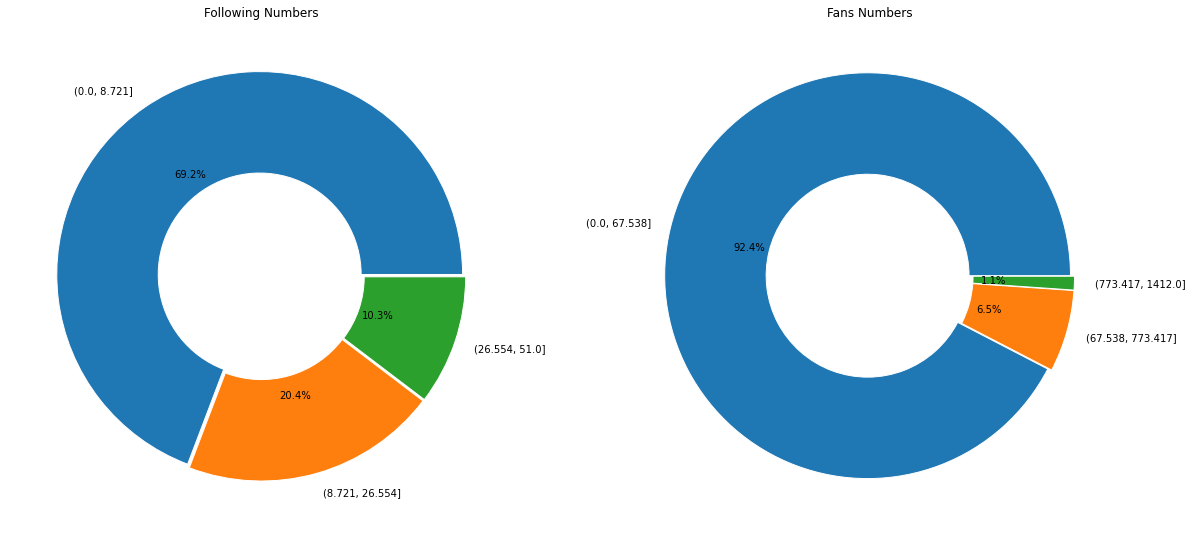

In [16]:
plt.figure(figsize=(20,18))## 设置画布

following = result1['following']
fans = result2['fans']

counts1 = result1['counts']
counts2 = result2['counts']

explode=[0.01,0.01,0.01]#设定各项距离圆心n个半径

plt.subplot(121)
plt.pie(counts1,explode=explode,labels=following,autopct='%1.1f%%',wedgeprops=dict(width=0.5,edgecolor='w'))#绘制面包圈图
plt.title('Following Numbers')

plt.subplot(122)
plt.pie(counts2,explode=explode,labels=fans,autopct='%1.1f%%',wedgeprops=dict(width=0.5,edgecolor='w'))#绘制面包圈图
plt.title('Fans Numbers')


plt.show()

In [17]:
df

,mid,name,rank,birthd0y,sign,level,vipType,vipStatus,following,fans,following_cate,fans_cate
2,21562406,'ffjsunshine',10000,0,0,3,0,0,11,0,Medium Following,Few fans
3,21562407,'ZHitlerZ',10000,1,1,3,0,0,6,1,Few Following,Few fans
4,21562408,'wenjan',10000,0,0,5,1,0,25,1,Medium Following,Few fans
5,21562409,'小爷很骚',10000,0,0,1,0,0,3,0,Few Following,Few fans
6,21562410,'弄昵称好烦',10000,0,0,2,0,0,2,0,Few Following,Few fans
...,...,...,...,...,...,...,...,...,...,...,...,...
1093,631616595,'bili_82622110408',5000,0,0,0,0,0,1,0,Few Following,Few fans
1094,631616596,'小小小小-0',5000,0,1,0,0,0,0,0,Few Following,Few fans
1095,631616612,'bili_21702037000',10000,0,0,1,0,0,1,0,Few Following,Few fans
1096,631616618,'玄剑林',10000,0,0,2,1,0,0,0,Few Following,Few fans


In [18]:
X=df.loc[:, ["birthd0y","sign","vipType","vipStatus","following","fans"]]
Y=df['level']

In [31]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=7, random_state=2022)
model.fit(X)
pred=model.predict(X)

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred, Y)
print(cm)

accuracy=(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6])/sum(sum(cm)) 
#cm[rows, columns]
print(accuracy)

[[827 178  25]
 [  0   4   5]
 [  2  29  28]]


IndexError: index 3 is out of bounds for axis 0 with size 3

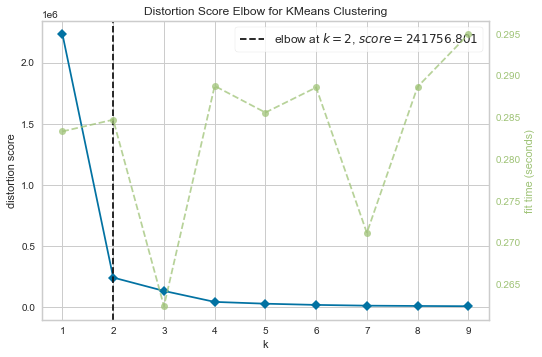

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from yellowbrick.cluster import KElbowVisualizer
v = KElbowVisualizer(model, k=(1,10))
v.fit(X)
v.show()

In [46]:
df = pd.read_csv('C:/Users/jjd20/bilibili_user_info - 副本.csv',encoding = 'gbk')

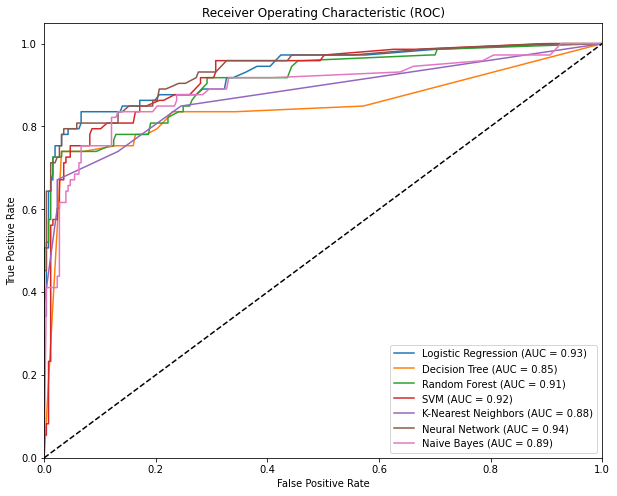

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# 选择特征列
features = df.loc[:, ["birthd0y", "sign", "vipType", "vipStatus", "following"]]
target = df['level']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# 建立并训练各个分类模型
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(probability=True),
    KNeighborsClassifier(),
    MLPClassifier(),
    GaussianNB()
]

model_names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'SVM',
    'K-Nearest Neighbors',
    'Neural Network',
    'Naive Bayes'
]

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score
results = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    y_prob = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    results.append([name, accuracy_train, accuracy_test, roc_auc])

# 构建结果DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy', 'AUC'])
print(results_df)

                 Model  Train Accuracy  Test Accuracy       AUC
0  Logistic Regression        0.891927       0.927273  0.931587
1        Decision Tree        0.950521       0.912121  0.838148
2        Random Forest        0.950521       0.915152  0.907254
3                  SVM        0.876302       0.896970  0.922472
4  K-Nearest Neighbors        0.911458       0.909091  0.875859
5       Neural Network        0.899740       0.921212  0.928495
6          Naive Bayes        0.863281       0.893939  0.892037


C:\Users\jjd20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
X=df.loc[:, ["birthd0y","sign","vipType","vipStatus","following"]]
Y=df['level']

In [52]:
model=KMeans(n_clusters=3, random_state=2022)
model.fit(X)
pred=model.predict(X)
cm=confusion_matrix(pred, Y)
print(cm)
accuracy=(cm[0,0]+cm[1,1]+cm[2,2])/sum(sum(cm)) 
#cm[rows, columns]
print(accuracy)

[[827 203   0]
 [  0   9   0]
 [  2  57   0]]
0.761384335154827


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()
model.fit(X, Y)
pred = model.predict(X)

cm = confusion_matrix(Y, pred)
print(cm)

accuracy = accuracy_score(Y, pred)
print("准确率:", accuracy)


[[808  21]
 [ 87 182]]
准确率: 0.9016393442622951


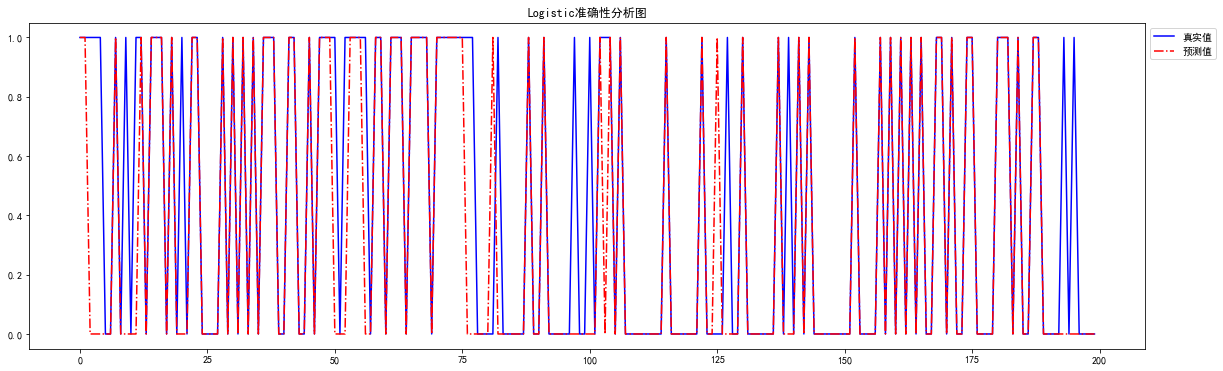

In [65]:
from matplotlib import rcParams
fig = plt.figure(figsize=(20,6)) ##size
plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换sans-serif字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负数的负号显示问题
##different color to mark the value
plt.plot(range(Y[:200].shape[0]),Y[:200],color="blue", linewidth=1.5, linestyle="-")
plt.plot(range(Y[:200].shape[0]),pred[:200],color="red", linewidth=1.5, linestyle="-.")
plt.legend(['真实值','预测值'], bbox_to_anchor=(1, 1), loc="upper left")
plt.title('Logistic准确性分析图')
plt.show()

In [67]:
model = RandomForestClassifier()
model.fit(X, Y)
pred = model.predict(X)

cm = confusion_matrix(Y, pred)
print(cm)

accuracy = accuracy_score(Y, pred)
print("准确率:", accuracy)

[[823   6]
 [ 48 221]]
准确率: 0.9508196721311475


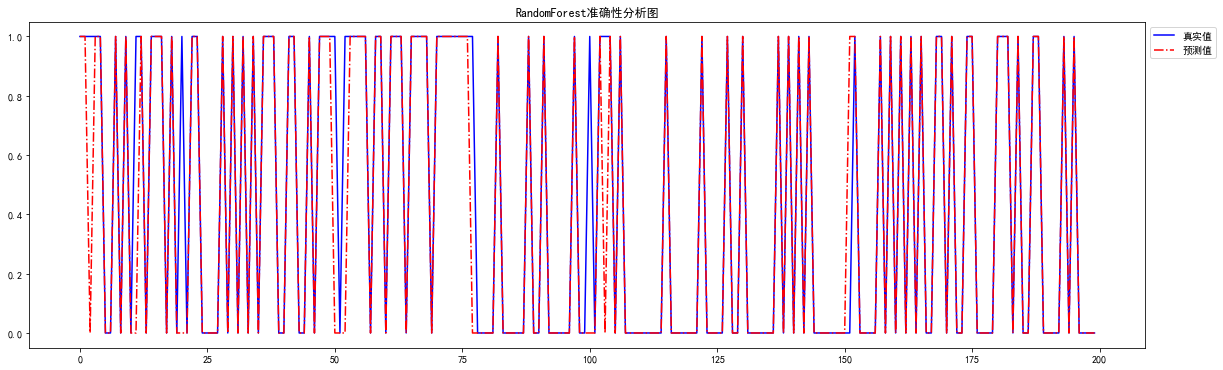

In [68]:
from matplotlib import rcParams
fig = plt.figure(figsize=(20,6)) ##size
##different color to mark the value
plt.plot(range(Y[:200].shape[0]),Y[:200],color="blue", linewidth=1.5, linestyle="-")
plt.plot(range(Y[:200].shape[0]),pred[:200],color="red", linewidth=1.5, linestyle="-.")
plt.legend(['真实值','预测值'], bbox_to_anchor=(1, 1), loc="upper left")
plt.title('RandomForest准确性分析图')
plt.show()

In [28]:
from sklearn.metrics import explained_variance_score,\
mean_absolute_error,\
mean_squared_error,\
median_absolute_error,r2_score
print('R^2 score in Logistic Regression is：'
      ,r2_score(Y,pred))
print('Absolute erro in Logistic Regression is：'
      ,mean_absolute_error(Y,pred))
print('Mean squared error in Logistic Regression is：'
      ,mean_squared_error(Y,pred))
print('Median absolute error in Logistic Regression is：'
      ,median_absolute_error(Y,pred))
print('Explained variance score in Logistic Regression is：'
      ,explained_variance_score(Y,pred))

R^2 score in Logistic Regression is： 0.5110162457014111
Absolute erro in Logistic Regression is： 0.15027322404371585
Mean squared error in Logistic Regression is： 0.15391621129326047
Median absolute error in Logistic Regression is： 0.0
Explained variance score in Logistic Regression is： 0.541186081136277


In [29]:
#载入模块
from sklearn import tree
from sklearn.model_selection import train_test_split

In [30]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(df.loc[:, ["birthd0y","sign","vipType","vipStatus","following","fans"]],
                                           df.level,
                                           test_size=0.3)

In [47]:
clf=tree.DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(Xtrain,Ytrain)
score=clf.score(Xtest,Ytest)#返回精确度
score

0.8393939393939394

In [41]:
import graphviz
feature_name = ['是否设置生日','是否设置签名','会员类型','会员状态','关注数','粉丝数']
dot_data=tree.export_graphviz(clf,
                              feature_names=feature_name,
                              class_names=["非活跃用户","一般活跃用户","重点活跃用户"],
                              filled=True,#填充颜色，颜色越深，不纯度越低
                              rounded=True#框的形状
                              )
graph=graphviz.Source(dot_data)
graph.render()

'Source.gv.pdf'

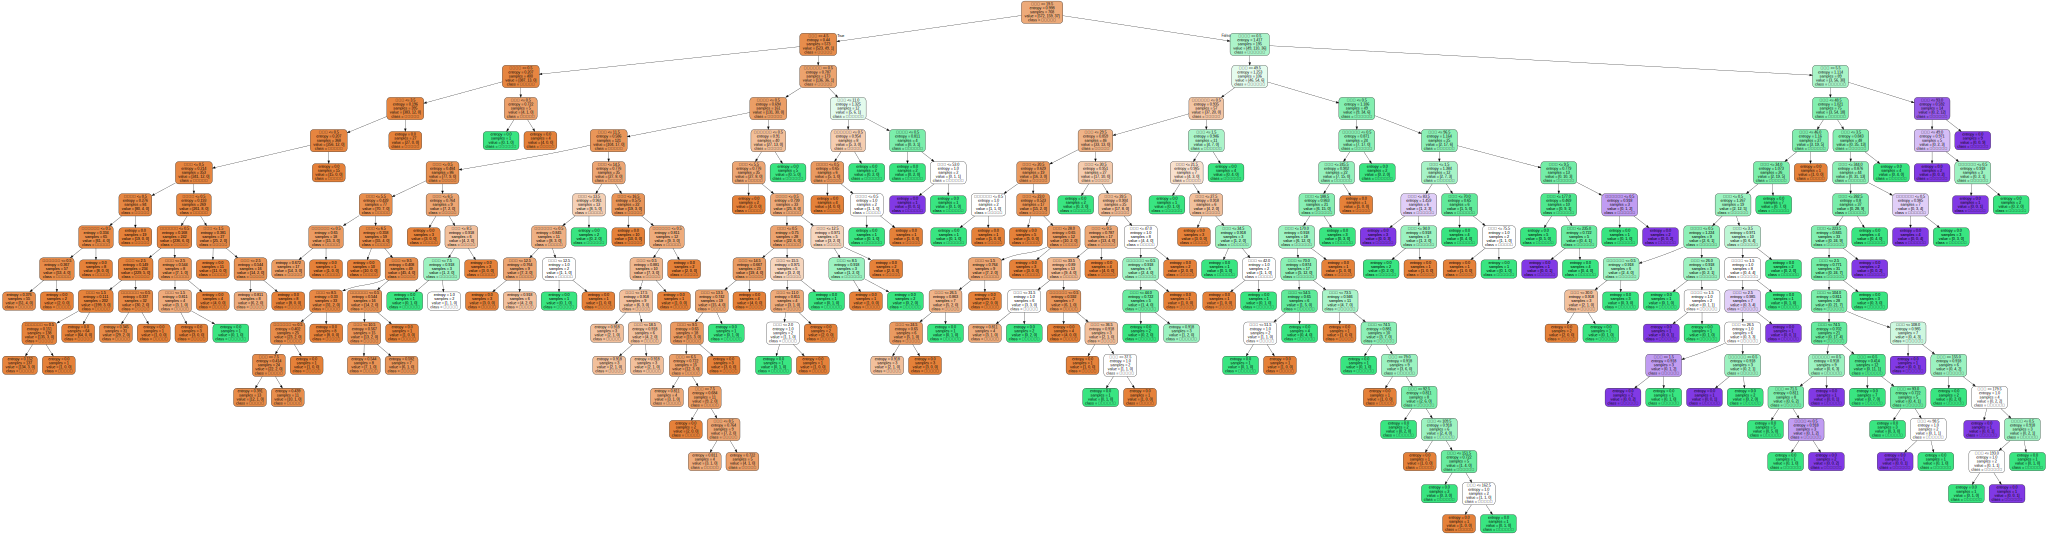

In [42]:
graph

In [43]:
clf.feature_importances_
[*zip(feature_name,clf.feature_importances_)]

[('是否设置生日', 0.03710589260896228),
 ('是否设置签名', 0.04895597726927549),
 ('会员类型', 0.08955831417761823),
 ('会员状态', 0.016101901723570032),
 ('关注数', 0.722277286419439),
 ('粉丝数', 0.08600062780113492)]

In [56]:
## 借助参数网格搜索找到合适的决策树模型参数
depths = np.arange(3,20,1)
leafnodes = np.arange(10,30,2)
tree_depth = []
tree_leafnode = []
val_acc = []

Xtrain,Xtest,Ytrain,Ytest=train_test_split(df.loc[:, ["birthd0y","sign","vipType","vipStatus","following","fans"]],
                                           df.level,
                                           test_size=0.3)

for depth in depths:
    for leaf in leafnodes:
        clf = tree.DecisionTreeClassifier(max_depth=depth, ## 最大深度
                                      max_leaf_nodes=leaf,##最大叶节点数
                                      min_samples_leaf=5,
                                      min_samples_split=2,
                                      random_state=1)
        clf = clf.fit(Xtrain,Ytrain)
        ## 计算在测试集上的预测精度
        clf_pre = clf.predict(Xtest)
        val_acc.append(clf.score(Xtest,Ytest))
        tree_depth.append(depth)
        tree_leafnode.append(leaf)
## 将结果组成数据表并输出较好的参数组合
DTCdf = pd.DataFrame(data = {"tree_depth":tree_depth,
                             "tree_leafnode":tree_leafnode,
                             "val_acc":val_acc})
## 根据在验证集上的精度进行排序
print(DTCdf.sort_values("val_acc",ascending=False))

     tree_depth  tree_leafnode   val_acc
17            4             24  0.863636
19            4             28  0.863636
16            4             22  0.863636
15            4             20  0.863636
14            4             18  0.863636
..          ...            ...       ...
129          15             28  0.827273
89           11             28  0.827273
99           12             28  0.827273
119          14             28  0.827273
169          19             28  0.827273

[170 rows x 3 columns]


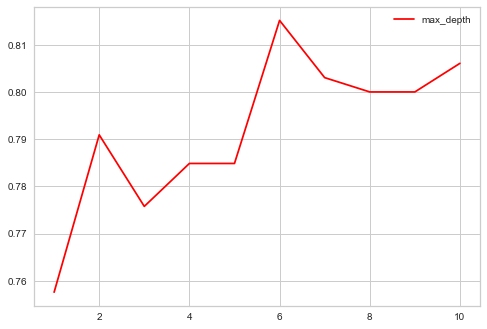

In [53]:
test=[]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(df.loc[:, ["birthd0y","sign","vipType","vipStatus","following","fans"]],
                                           df.level,
                                           test_size=0.3)
for i in range(10):
    clf=tree.DecisionTreeClassifier(criterion="gini"
                                ,random_state=30
                               ,splitter='random'
                                ,max_depth=i+1
                               # ,min_samples_leaf=10
                                #,min_samples_split=10
    )
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [63]:
 ## 使用较合适的参数建立决策树分类器
Xtrain,Xtest,Ytrain,Ytest=train_test_split(df.loc[:, ["birthd0y","sign","vipType","vipStatus","following","fans"]],
                                           df.level,
                                           test_size=0.3)

dtc2 = tree.DecisionTreeClassifier(max_depth=6, ## 最大深度
                              max_leaf_nodes=10, ## 最大叶节点数量
                              min_samples_leaf=5,min_samples_split=2,
                              random_state=1)
dtc2 = dtc2.fit(Xtrain,Ytrain)
print("训练数据集上的精度:",dtc2.score(Xtrain,Ytrain))
print("验证数据集上的精度:",dtc2.score(Xtest,Ytest))

训练数据集上的精度: 0.8684895833333334
验证数据集上的精度: 0.8212121212121212


In [68]:
## 可视化决策树经过剪剪枝后的树结构
dot_data = tree.export_graphviz(dtc2,
                           feature_names=feature_name,
                           class_names=["非活跃用户","一般活跃用户","重点活跃用户"],
                           filled=True,#填充颜色，颜色越深，不纯度越低
                           rounded=True#框的形状
                          )
graph=graphviz.Source(dot_data)
graph.render()

'Source.gv.pdf'

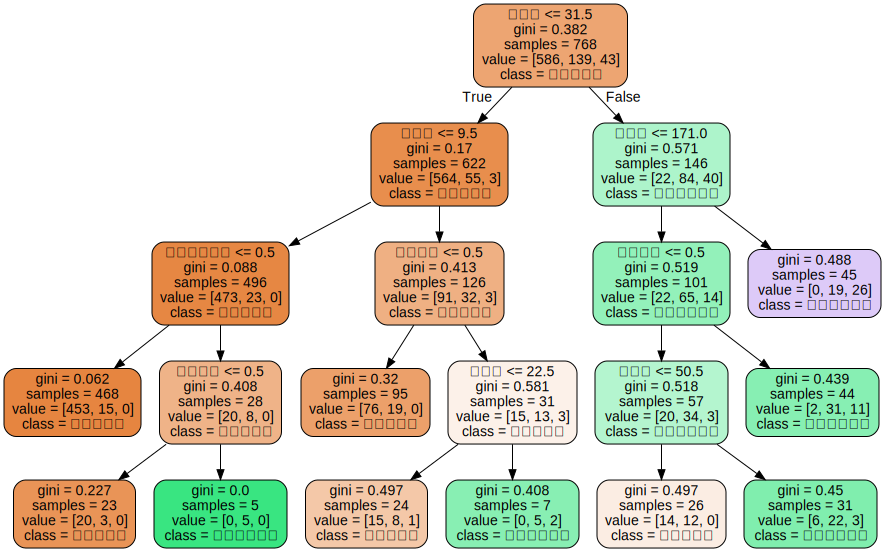

In [69]:
graph